<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [30]:
original_data=pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')
data=original_data.copy()

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [31]:
display(data.head(2))
display(data.tail(2))

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [32]:
cols_null_percent=data.isnull().mean()*100
cols_with_null=cols_null_percent[cols_null_percent>0]

for i in cols_with_null.index:
    display(f'Имеются пропуски в столбце {i} в количестве {data[i].isnull().value_counts()[True]} или {round(cols_with_null[i],3)}%')

display(data[cols_with_null.index].head(3))
data.info()

'Имеются пропуски в столбце Опыт работы в количестве 168 или 0.375%'

'Имеются пропуски в столбце Последнее/нынешнее место работы в количестве 1 или 0.002%'

'Имеются пропуски в столбце Последняя/нынешняя должность в количестве 2 или 0.004%'

,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность
0,Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор
1,Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель"
2,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [33]:
#не особо понимаю, что от меня требуется, поэтому вот )
for i in data.columns:
    display(data[i].describe())

count                                             44744
unique                                            16003
top       Мужчина ,  32 года , родился 17 сентября 1986
freq                                                 18
Name: Пол, возраст, dtype: object

count          44744
unique           690
top       50000 руб.
freq            4064
Name: ЗП, dtype: object

count                       44744
unique                      14929
top       Системный администратор
freq                         3099
Name: Ищет работу на должность:, dtype: object

count                                                 44744
unique                                                10063
top       Москва , не готов к переезду , не готов к кома...
freq                                                   1261
Name: Город, переезд, командировки, dtype: object

count                44744
unique                  38
top       полная занятость
freq                 30026
Name: Занятость, dtype: object

count           44744
unique             47
top       полный день
freq            22727
Name: График, dtype: object

count                                                 44576
unique                                                44413
top       Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...
freq                                                      3
Name: Опыт работы, dtype: object

count                                                 44743
unique                                                30214
top       Индивидуальное предпринимательство / частная п...
freq                                                    935
Name: Последнее/нынешнее место работы, dtype: object

count                       44742
unique                      16927
top       Системный администратор
freq                         2062
Name: Последняя/нынешняя должность, dtype: object

count                                                 44744
unique                                                40148
top       Высшее образование 1987 Военный инженерный Кра...
freq                                                      4
Name: Образование и ВУЗ, dtype: object

count                44744
unique               18838
top       07.05.2019 09:50
freq                    25
Name: Обновление резюме, dtype: object

count          44744
unique             2
top       Не указано
freq           32268
Name: Авто, dtype: object

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [34]:
data['Образование']=data['Образование и ВУЗ'].apply(lambda x: ' '.join((x.split(" ")[:2]))) # вытаскиваем нужное из Образование и ВУЗ
data['Образование']=data['Образование'].apply(lambda x: x.replace(' образование','')) # удаляем ненужное слово
data.drop('Образование и ВУЗ', axis=1,inplace=True) # удаления грязного столбца

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [35]:
data['Пол']=data['Пол, возраст'].apply(lambda x:'М' if 'Мужчина' in x else 'Ж') # вытаскиваем Пол из грязного столбца
data['Возраст']=data['Пол, возраст'].apply(lambda x: x.replace('Мужчина , ','')) # В "Пол, Возраст" убираем пол и превращаем в возраст
data['Возраст']=data['Возраст'].apply(lambda x: x.replace('Женщина , ',''))
data['Возраст']=data['Возраст'].apply(lambda x: x[:3]) # наводим порядок в данных
data['Возраст']=data['Возраст'].apply(lambda x: x.replace(' ',''))
data['Возраст']=data['Возраст'].astype('int64') # на всякий случай меняем тип данных, чтоб в будущем не спотыкаться
data=data.drop('Пол, возраст',axis=1)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [36]:
def experience(arg):
    ''' Задача функции: очистить ненужные данные и вытащить опыт работы в месяцах'''
    if arg is np.nan or arg=='Не указано': # там, где некорректно, ставим НАН
        return None
    need_data=str(arg).split(' ')[2:6] # нужные данные находятся в определенном промежутке, тогда зачем загружать функцию ненужной информацией
    months=0
    for i,j in enumerate(need_data):
        if ((j=='лет') or (j=='года') or (j=='года')): # ищем годы и превращаем их в месяцы
            months+=int(need_data[i-1])*12
        if ((j=='месяц') or (j=='месяца') or (j=='месяцев')): # добавляем месяцы при нахождении "месяца"
            months+=int(need_data[i-1])
            
    return months

data['Опыт работы (месяц)']=data['Опыт работы'].apply(experience)
data.drop('Опыт работы',axis=1,inplace=True) # удаление ненужного

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [37]:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
                  'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]

def city_function(arg):
    '''Функция закидывает название города в определенную группу'''
    x=arg.split(' ')[0]
    if x=='Москва' or x=='Санкт-Петербург':
        return x
    elif x in million_cities: # если есть в списке миллионников
        return 'город-миллионник'
    else:
        return 'другие'
    
data['Город']=data['Город, переезд, командировки'].apply(city_function)

#--------------------------------------------------------------------------

def relocate_ready(arg):
    '''Функция определяет готовность к переезду'''
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    if ('хочу переехать' in arg):
        return True
    else:
        return True
    
data['Готовность к переезду']=data['Город, переезд, командировки'].apply(relocate_ready)

#-------------------------------------------------------------------------------

def go_away(arg):
    '''Функция вытаскивает готовность к переезду'''
    if ('командировка' in arg):
        if (('не готов к командировкам' in arg) or ('не готова к командировкам' in arg)):
            return False
        else:
            return True
    return False

data['Готовность к командировкам']=data['Город, переезд, командировки'].apply(go_away)

data.drop('Город, переезд, командировки', axis=1,inplace=True) # удаляем грязь

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [38]:
data['полная занятость']=data['Занятость'].apply(lambda x: True if ('полная занятость' in x) else False) # определяем тип занятости
data['частичная занятость']=data['Занятость'].apply(lambda x: True if ('частичная занятость' in x) else False)
data['проектная работа']=data['Занятость'].apply(lambda x: True if ('проектная работа' in x) else False)
data['стажировка']=data['Занятость'].apply(lambda x: True if ('стажировка' in x) else False)
data['волонтерство']=data['Занятость'].apply(lambda x: True if ('волонтерство' in x) else False)

data['вахтовый метод']=data['График'].apply(lambda x: True if ('вахтовый метод' in x) else False) # и очищаем график
data['гибкий график']=data['График'].apply(lambda x: True if ('гибкий график' in x) else False)

data.drop('Занятость','График', axis=1, inplace=True) # удаляем грязь


TypeError: DataFrame.drop() takes from 1 to 2 positional arguments but 3 positional arguments (and 2 keyword-only arguments) were given

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [ ]:
original_valute=pd.read_csv('ExchangeRates.csv') # открываем
valute=original_valute.copy() # оригинал не трогаем, ибо ибо
valute.drop(['per', 'time', 'vol'], axis=1, inplace=True) # ненужное лесом
valute['date']=pd.to_datetime(valute['date']).dt.date # делаем даты
data['Обновление резюме']=pd.to_datetime(data['Обновление резюме'],dayfirst=True).dt.date # делаем даты

data['ЗП']=data['ЗП'].apply(lambda x: str(x).replace('бел.руб.','BYN')) # переименовка
data['ЗП']=data['ЗП'].apply(lambda x: str(x).replace('грн.','UAH'))
data['ЗП']=data['ЗП'].apply(lambda x: str(x).replace('руб.','RUB'))
data['ЗП']=data['ЗП'].apply(lambda x: str(x).replace('сум','UZS'))

data['Валюта']=data['ЗП'].apply(lambda x: str(x).split(' ')[-1]) # вытаскиваем валюту, чтоб каждый раз не писать

merged=data.merge(valute, # объединяем таблички
                  left_on=['Обновление резюме', 'Валюта'],
                  right_on=['date', 'currency'],
                  how='left')

merged['ЗП']=merged['ЗП'].apply(lambda x: str(x).split(' ')[0]) # оставляем голые цифры без валюты
merged['ЗП']=merged['ЗП'].astype('int64') # на всякий,чтоб не ругалось

merged['close']=merged['close'].fillna(1) # там,где рубли ставим единицы для формулы
merged['currency']=merged['currency'].fillna('RUB')
merged['date']=merged['date'].fillna(merged['Обновление резюме'])
merged['proportion']=merged['proportion'].fillna(1) # такая ж операцияя
merged['ЗП (руб)']=round(merged['ЗП']*merged['close']/merged['proportion']) # математика
merged.drop('ЗП',axis=1,inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_3952\2162075318.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  valute['date']=pd.to_datetime(valute['date']).dt.date # делаем даты


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,...,стажировка,волонтерство,вахтовый метод,гибкий график,Валюта,currency,date,close,proportion,ЗП (руб)
33654,Frontend-разработчик,"стажировка, частичная занятость, проектная раб...","гибкий график, полный день, удаленная работа",Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,10,...,True,False,False,True,RUB,RUB,2019-04-19,1.0,1.0,60000.0


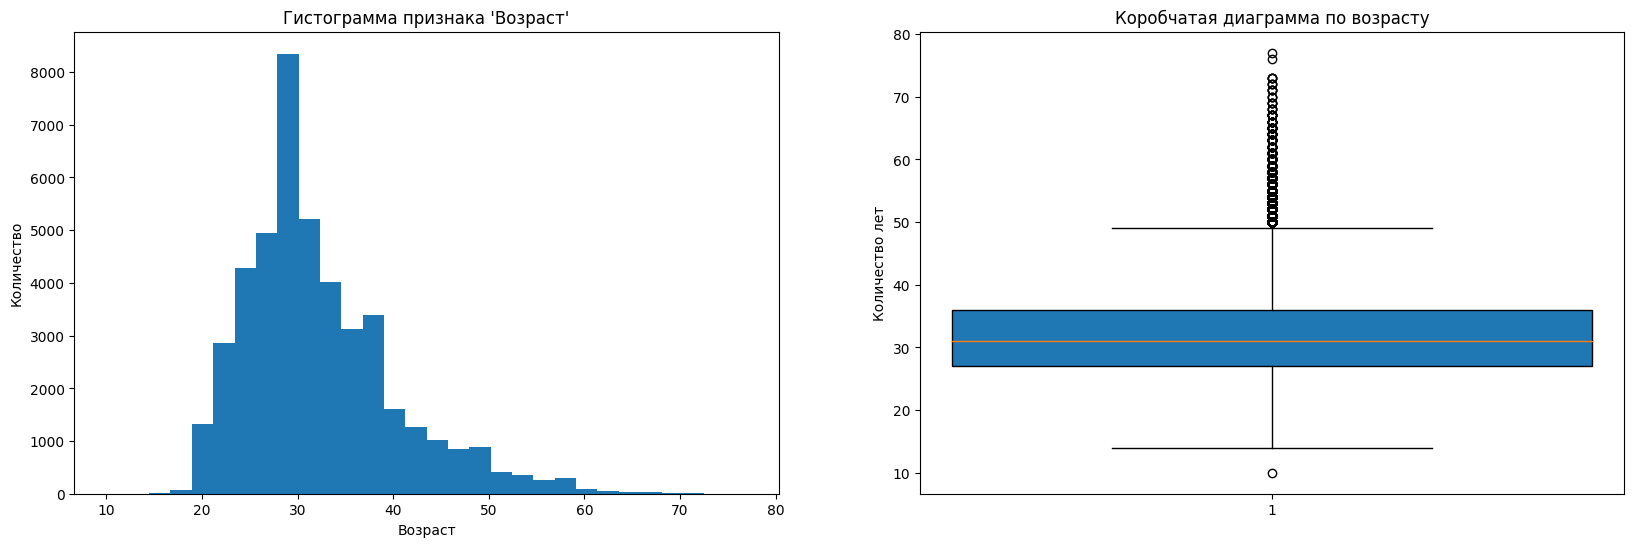

In [ ]:

fig,axes=plt.subplots(1,2,
                      figsize=(20,6))
axes[0].hist(x=merged['Возраст'], # гистограмма
          bins=30);
axes[0].set_title("Гистограмма признака 'Возраст'");
axes[0].set_xlabel('Возраст');
axes[0].set_ylabel('Количество');

axes[1].boxplot(merged['Возраст'], # коробчатая
            widths=100,
            patch_artist=True
            );
axes[1].set_title('Коробчатая диаграмма по возрасту');
axes[1].set_ylabel('Количество лет');

merged[merged['Возраст']==10] # просто показываю, что уже что-то не так с данными

Мода распределения равна 30 годам. Минимальный возраст, как ни странно - 10 лет, максимальный возраст - 77 лет.

Возраст большинства соискателей: по 25 и 75 квантилю - от 27 до 36 лет.


 <center> По аномалиям </center>

Само собой минимальный возраст в 10 лет, ибо работать минимум можно с 14 лет. Немного изучив 10-летнего можно обратить внимание на образование ("Среднее специальное"),так что в будущем надо бы избавиться от него

Верхний возраст заставил призадуматься, 63 года - это средний возраст мужчин (яндекс помог), как бы резко это ни звучало.

---
---


2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

count    44574.000000
mean       110.592318
std         78.434529
min          0.000000
25%         55.000000
50%         97.000000
75%        151.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

0    9.0
Name: Опыт работы (месяц), dtype: float64

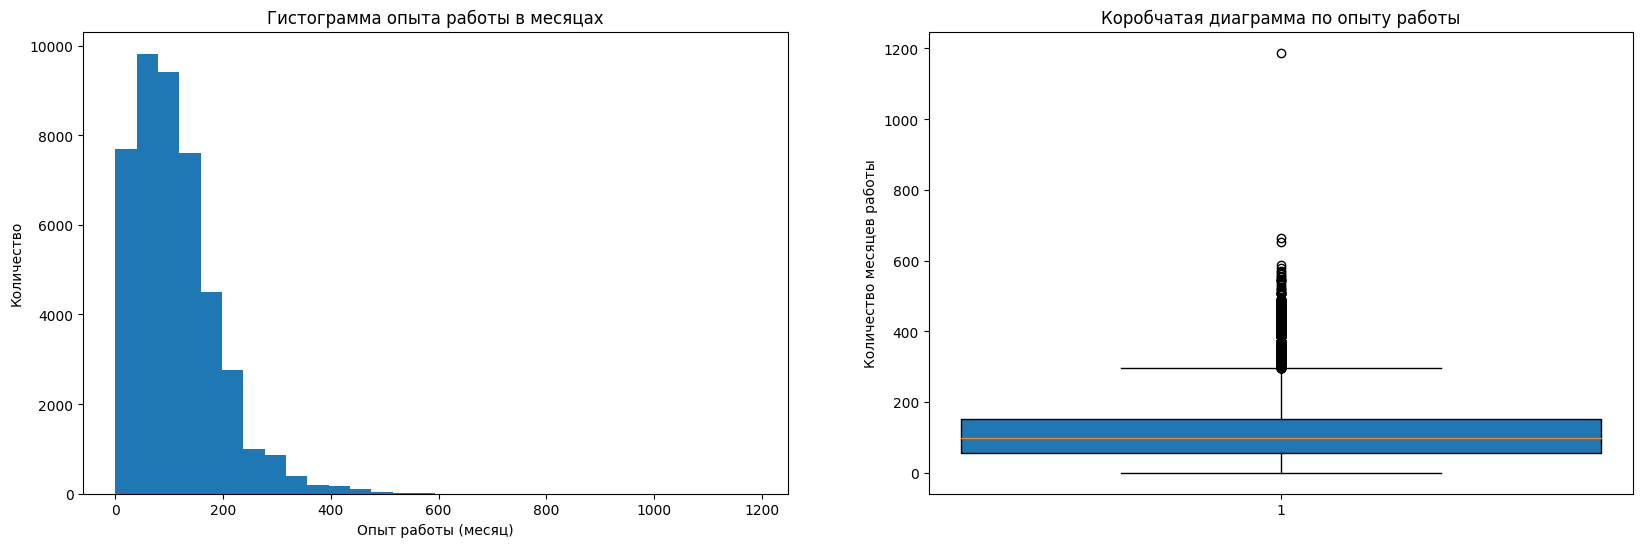

In [ ]:
display(merged['Опыт работы (месяц)'].describe())
display(merged['Опыт работы (месяц)'].mode()) #модальное значение возраста
fig,axes=plt.subplots(1,2,
                      figsize=(20,6))
axes[0].hist(x=merged['Опыт работы (месяц)'], # гистограмма
          bins=30);
axes[0].set_title("Гистограмма опыта работы в месяцах");
axes[0].set_xlabel('Опыт работы (месяц)');
axes[0].set_ylabel('Количество');

mask=merged['Опыт работы (месяц)'].isnull()==False # создаем маску, чтоб не использовать некорректную информацию
merged_without_null=merged[mask]

axes[1].boxplot(merged_without_null['Опыт работы (месяц)'], # для коробчатой диаграммы
            widths=100,
            patch_artist=True
            );
axes[1].set_title('Коробчатая диаграмма по опыту работы');
axes[1].set_ylabel('Количество месяцев работы');


Модальное значение опыта работы - 9 месяцев.
Квантили показывают: 25% - 55 месяцев (4 года 7 месяцев), 75% - 151 месяц (12лет 7 месяцев).
1188 месяцев работы, это почти 100 лет. Люди так долго не живут обычно.


---
---

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


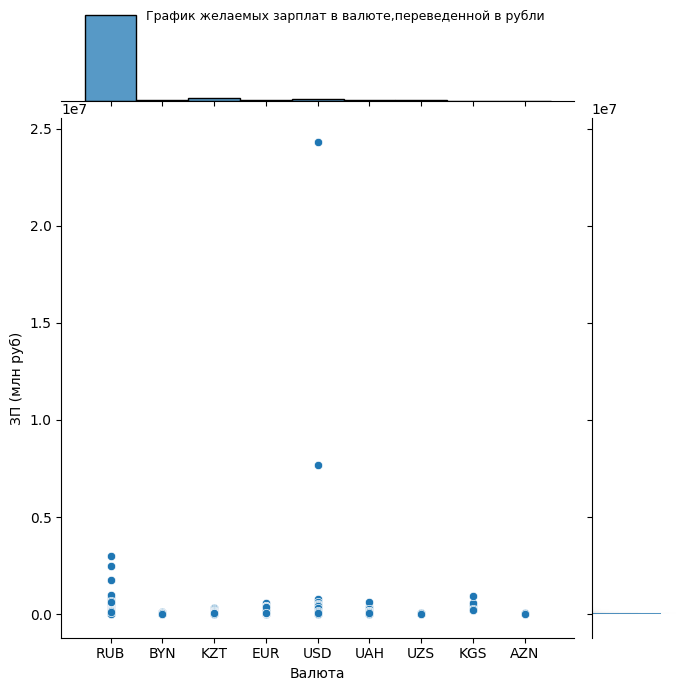

In [ ]:
merged['ЗП (руб)']=merged['ЗП (руб)'].astype('int64')

jointplot=sns.jointplot( #раскидаем желаемые зарплаты, по валютам, которые были значально
    data=merged,
    x='Валюта',
    y='ЗП (руб)',
    height=7
);
jointplot.ax_joint.set_ylabel('ЗП (млн руб)');
jointplot.fig.suptitle('График желаемых зарплат в валюте,переведенной в рубли', fontsize=9);


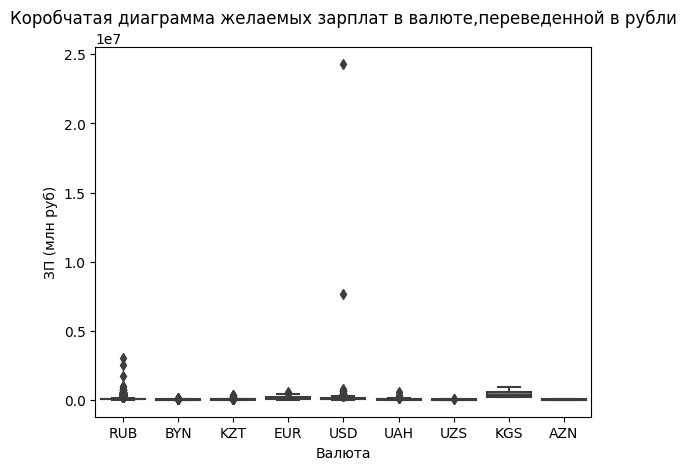

In [ ]:
boxplot=sns.boxplot( #раскидаем желаемые зарплаты, по валютам, которые были значально
    data=merged,
    x='Валюта',
    y='ЗП (руб)'
);
boxplot.set_title('Коробчатая диаграмма желаемых зарплат в валюте,переведенной в рубли');
boxplot.set_ylabel('ЗП (млн руб)');

Минимальная ЗП в 1 рубль сразу напрягла, поэтому глянул сколько выйдет вакансий с желанной ЗП менее 10 000 руб. Их оказалось 211 (а так в идеале надо посмотреть на минимальную заработную плату каждой страны).

Также обратил внимание на валюту USD, уж больно высокие желания по ЗП у людей.

---
---


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

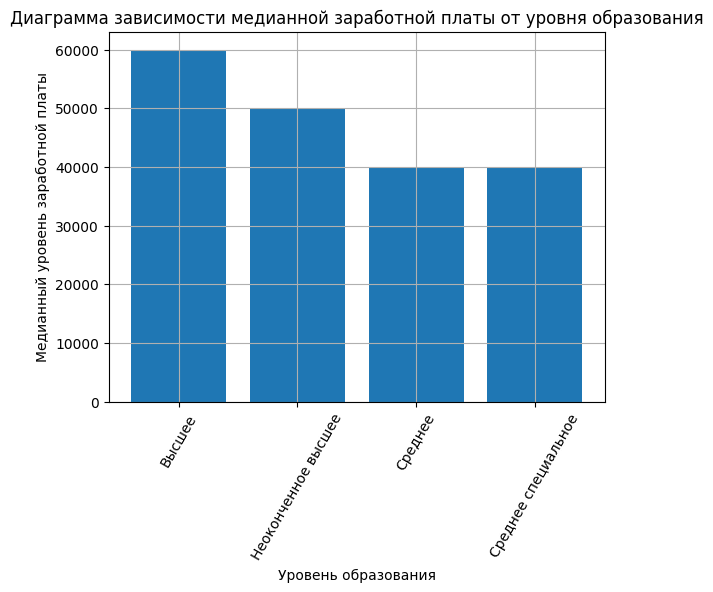

In [ ]:
mask_data=merged[merged['ЗП (руб)']<1000000].groupby('Образование')['ЗП (руб)'].median()
mask_data
fig,the_ax=plt.subplots(1,1)
the_ax.bar(
    x=mask_data.index,
    height=mask_data
);
the_ax.set_title('Диаграмма зависимости медианной заработной платы от уровня образования')
the_ax.set_ylabel('Медианный уровень заработной платы');
the_ax.set_xlabel('Уровень образования');
the_ax.grid()
the_ax.xaxis.set_tick_params(rotation=60)

Минимальная медианная ЗП в 40000 рублей наблюдается у среднего и среднего специиального образования.

Максимальная медианная ЗП в 60000 рублей - у высшего.

Как видно,чем лучше образование, тем и больше заработная плата. Образование, образование и еще раз образование.

---
---

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

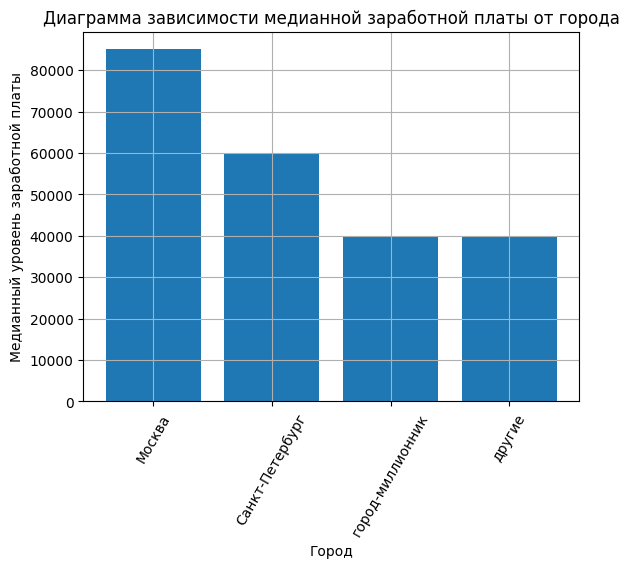

In [ ]:
mask_data=merged[merged['ЗП (руб)']<1000000].groupby('Город')['ЗП (руб)'].median()

fig,the_ax=plt.subplots(1,1)
the_ax.bar(
    x=mask_data.index,
    height=mask_data
);
the_ax.set_title('Диаграмма зависимости медианной заработной платы от города')
the_ax.set_ylabel('Медианный уровень заработной платы');
the_ax.set_xlabel('Город');
the_ax.grid()
the_ax.xaxis.set_tick_params(rotation=60);


Лучшие зарплаты находятся в Москве и Санкт-Петербурге, а в остальных городах примерно все одинаково

---
---


6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

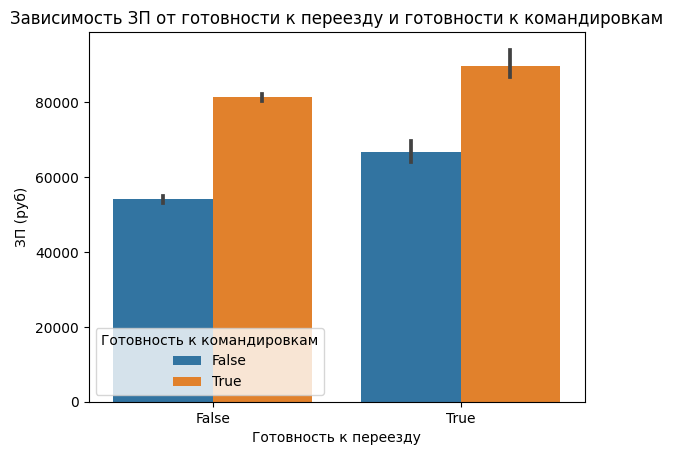

In [ ]:
barplot=sns.barplot(
    data=merged,
    x='Готовность к переезду',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
);
barplot.set_title('Зависимость ЗП от готовности к переезду и готовности к командировкам');


***Готовность к перезду*** конечно же повышает возможность получения лучшей заработной платы, однако ***готовность к командировкам*** делает это лучше

---
---

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

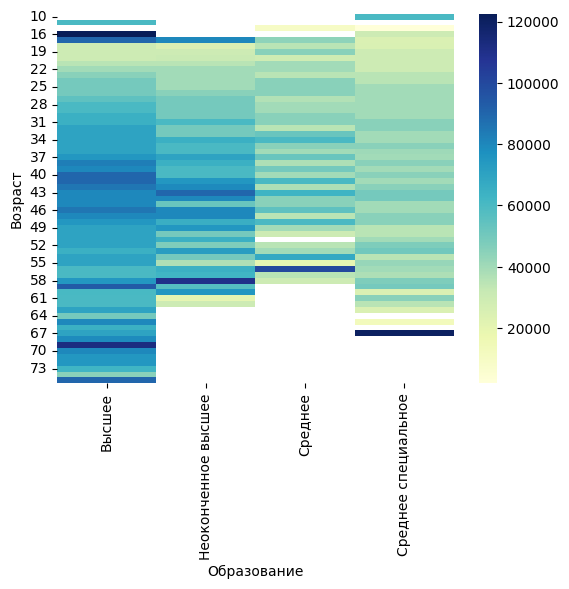

In [ ]:
grouped_data=merged.groupby(['Возраст','Образование'])['ЗП (руб)'].median().unstack()
grouped_data.columns=grouped_data.columns.astype('string')

heatmap=sns.heatmap(
    data=grouped_data,
    cmap='YlGnBu'
);

Как и сообщалось ранее, чем лучше образование,тем и выше желаемая ЗП. Однако высокообразованные и неокончившие высшее образование молодые люди слишком сильно на что-то надеются, т.к. вакансии людей чуть постарше показывают,что хорошие ЗП ждут людей уже постарше, ибо у тех ж опыта больше.
Люди со средним и средним специальным особо не шикуют и могут надеяться лишь на свой профессионализм.

---
---



8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

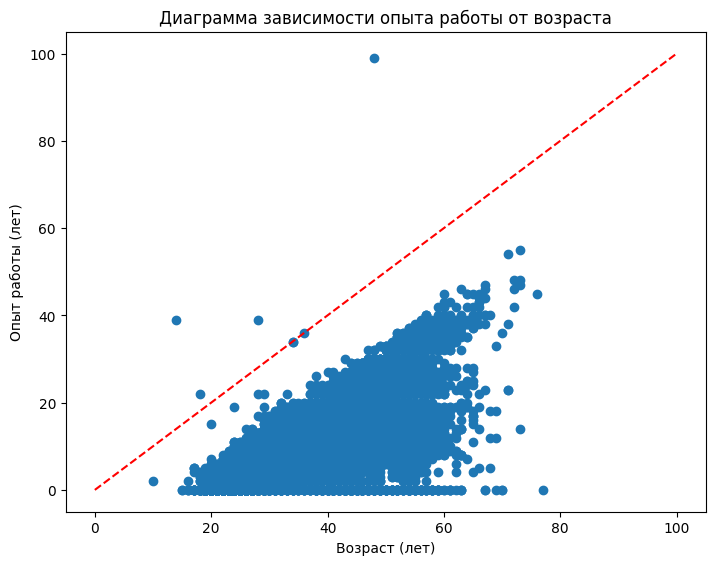

In [ ]:
merged['Опыт работы (лет)']=merged['Опыт работы (месяц)']//12 #перевод в годы
fig=plt.figure() #полотно
axes=fig.add_axes([0,0,1,1]) #график
axes.scatter(
    x=merged['Возраст'],
    y=merged['Опыт работы (лет)']
);
axes.set_xlabel('Возраст (лет)');
axes.set_ylabel('Опыт работы (лет)');
axes.set_title('Диаграмма зависимости опыта работы от возраста')

x=np.linspace(0,100) #линия
y=x
plt.plot(x,y,'r--');

Показатели выше или на красной линии являются аномалиями. 10-летняя точка тоже аномалия (уже сообщалось). Также я б добавил в аномалии точки, находящиеся слишком близко к красной линии,ибо верить им, то работают люди раньше, чем с 10 лет

---
---

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
grouped_data=merged.groupby(by=['Пол','Город','Образование'], as_index=False)['ЗП (руб)'].median()
grouped_data
fig=px.treemap( #
    grouped_data,
    path=['Пол','Город','Образование'],
    values='ЗП (руб)',
    height=700,
    width=1300,
    title='График соотношения желаемой зработной платы к полу, городу, образованию'
);
fig.show()


mask_data=merged[merged['ЗП (руб)']<1000000]

fig=px.scatter_3d(
    mask_data,
    x='Образование',
    y='Опыт работы (лет)',
    z='ЗП (руб)',
    color='Валюта',
    height=500,
    width=800
);
fig.show()


Судя по графику,что мужчины желают ЗП на 28.5% больше, чем женщины (учитывая общие данные). Учли признаки "Город" и "Образование", и везде ЗП (руб) мужчин больше.
Убрав валюту RUB обратил внимание, на то, что размер ЗП растет пропорционально опыту работы

---
---



# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
dupl_columns=list(merged.columns) # названия столбцов
display(merged[merged.duplicated(subset=dupl_columns)].shape[0])
merged=merged.drop_duplicates(subset=dupl_columns)

merged.drop(['currency','date','close','proportion'],axis=1,inplace=True) #надо было удалить раньше

159

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
for i in merged.columns:
    if (merged[i].isnull().mean()>0):
        display(f"В стобце {i} количество пропусков составляет {merged[i].isnull().value_counts()[True]}")
merged.drop('Опыт работы (лет)', axis=1,inplace=True)

'В стобце Последнее/нынешнее место работы количество пропусков составляет 1'

'В стобце Последняя/нынешняя должность количество пропусков составляет 2'

'В стобце Опыт работы (месяц) количество пропусков составляет 168'

'В стобце Опыт работы (лет) количество пропусков составляет 168'

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
values={'Опыт работы (месяц)':merged['Опыт работы (месяц)'].median()}
merged=merged.fillna(values)
merged=merged.dropna(how='any', axis=0)
#merged.isnull().mean()

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:

outliers=merged[(merged['ЗП (руб)']>1000000)|(merged['ЗП (руб)']<1000)]
merged.drop(outliers.index, axis=0,inplace=True)


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [42]:
to_delete=(merged['Опыт работы (месяц)']/12)>merged['Возраст']
merged.drop(to_delete.index,axis=0) # удаляем грязные строки

,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,...,Готовность к командировкам,полная занятость,частичная занятость,проектная работа,стажировка,волонтерство,вахтовый метод,гибкий график,Валюта,ЗП (руб)
0,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее,М,39,...,False,True,True,True,False,False,True,True,RUB,29000
1,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,Высшее,М,60,...,True,True,True,True,False,False,False,True,RUB,40000
2,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,Среднее специальное,Ж,36,...,False,True,False,False,False,False,False,False,RUB,20000
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,2019-04-08,Не указано,Высшее,М,38,...,True,True,True,True,False,False,False,True,RUB,100000
4,Региональный менеджер по продажам,полная занятость,полный день,Мармелад,Менеджер по продажам,2019-04-22,Не указано,Высшее,Ж,26,...,True,True,False,False,False,False,False,False,RUB,140000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44739,"Финансист, аналитик, экономист, бухгалтер, мен...",полная занятость,"полный день, удаленная работа","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,2019-04-22,Не указано,Высшее,М,30,...,True,True,False,False,False,False,False,False,RUB,50000
44740,"Системный администратор, IT-специалист","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...",ИП Пестрецов,Предприниматель,2019-04-22,Не указано,Высшее,М,27,...,True,True,True,True,False,False,False,True,RUB,39000
44741,"Аналитик данных, Математик",полная занятость,"полный день, удаленная работа","ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,2019-04-09,Не указано,Высшее,Ж,48,...,True,True,False,False,False,False,False,False,RUB,40000
44742,Контент-менеджер,"частичная занятость, полная занятость",удаленная работа,IQ-Maxima,Менеджер проектов,2019-04-26,Имеется собственный автомобиль,Высшее,М,24,...,False,True,True,False,False,False,False,False,RUB,20000


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

'Численный показатель ассиметрии 0.446'

,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,...,Готовность к командировкам,полная занятость,частичная занятость,проектная работа,стажировка,волонтерство,вахтовый метод,гибкий график,Валюта,ЗП (руб)
29098,Ведущий инженер-программист,полная занятость,полный день,"КБ Аметист, Концерн АГАТ",Ведущий инженер-программист,2019-04-26,Не указано,Высшее,М,14,...,False,True,False,False,False,False,False,False,RUB,60000
31137,Менеджер по работе с клиентами,частичная занятость,"гибкий график, сменный график, удаленная работа","ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,Среднее,М,15,...,False,False,True,False,False,False,False,True,RUB,10000
32950,Тестировщик игр,полная занятость,полный день,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,Среднее специальное,М,15,...,False,True,False,False,False,False,False,False,RUB,2000
33654,Frontend-разработчик,"стажировка, частичная занятость, проектная раб...","гибкий график, полный день, удаленная работа",Freelance,Frontend-разработчик,2019-04-19,Не указано,Среднее специальное,М,10,...,True,True,True,True,True,False,False,True,RUB,60000


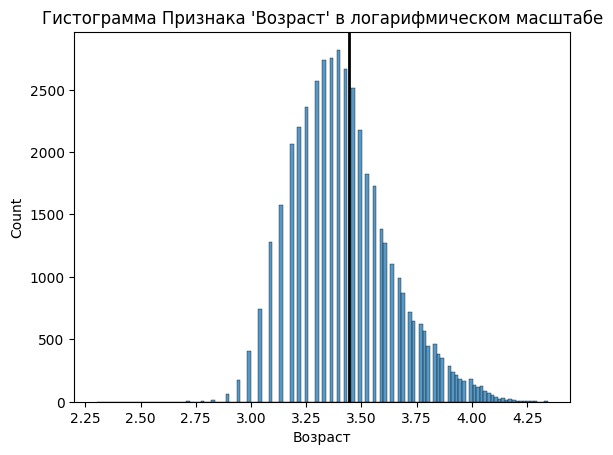

In [ ]:
fig,axes=plt.subplots()
log_age=np.log(merged['Возраст'])
histplot=sns.histplot(log_age);
histplot.axvline(log_age.mean(), color='k', lw=2);
histplot.set_title("Гистограмма Признака 'Возраст' в логарифмическом масштабе");
display(f'Численный показатель ассиметрии {round(log_age.skew(),3)}')

def outliers_z_score(data,feature):
    '''Нахождение выбросов методом z-отклонений'''
    x=np.log(data[feature])
    mu=x.mean()
    sigma=x.std()
    lower_bound=mu-3*sigma
    upper_bound=mu+4*sigma
    outliers=data[(x<lower_bound)|(x>upper_bound)]
    cleaned=data[(x>lower_bound)&(x<upper_bound)]
    return outliers, cleaned
outliers,cleaned=outliers_z_score(merged,'Возраст')
outliers


Распределение имеет правостороннюю ассиметрию. Люди в возрасто 14, 15 и 10 лет попадают под категорию выбросов.